# Fetching Dataset

In [1]:
#Fetching Data
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784')

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
x, y = mnist['data'], mnist['target']

In [4]:
x.shape


(70000, 784)

In [5]:
y.shape

(70000,)

In [6]:
%matplotlib inline

In [7]:
import matplotlib
import matplotlib.pyplot as plt

In [8]:
some_digit = x.loc[2500]
some_digit_image = some_digit.values.reshape(28,28)

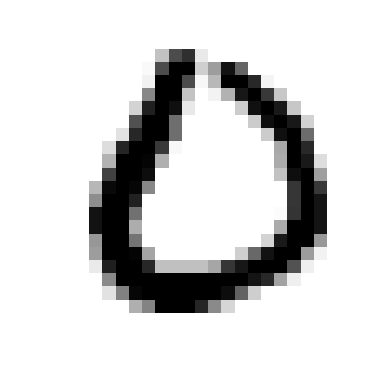

In [9]:
plt.imshow(some_digit_image, cmap='binary', interpolation='nearest')
plt.axis('off')
plt.show()



In [10]:
y[2500]

'0'

In [11]:
x_train = x[0:6000]

In [12]:
x_test = x[6000:7000]

In [13]:
y_train = y[0:6000]

In [14]:
y_test = y[6000:7000]

In [15]:
import numpy as np
shuffle_index = np.random.permutation(x_train.shape[0])
x_train = x_train.iloc[shuffle_index]
y_train = y_train.iloc[shuffle_index]

In [16]:
#Creating a 3 detector

In [17]:
y_train = y_train.astype(np.int8)#string to integer
y_test = y_test.astype(np.int8)

In [18]:
y_train_3 = (y_train==3)
y_test_3 = (y_test==3)

In [19]:
y_train

1978    5
757     5
2019    2
1230    1
5442    3
       ..
5376    8
693     2
5356    4
727     9
2490    4
Name: class, Length: 6000, dtype: int8

In [20]:
#logistic regression sklearn
from sklearn.linear_model import LogisticRegression

In [21]:
clf = LogisticRegression(tol=0.1)

In [22]:
clf.fit(x_train, y_train_3)

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(tol=0.1)

In [23]:
clf.predict([some_digit])

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([False])

In [24]:
#cross validation

In [25]:
from sklearn.model_selection import cross_val_score
a = cross_val_score(clf, x_train, y_train_3, cv=3, scoring="accuracy")

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

In [26]:
a.mean()

0.9441666666666667